In [4]:
from sklearn import tree
from sklearn import metrics
from plot_confusion_matrix import *
import pandas as pd
from cca import Cca as cca
import numpy as np
import tca 
import ascr
file_path1='./data/sample.csv'
#file_path2='out_of_sample.csv'
#train_sample = pd.read_csv(file_path1)
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
train_sample=pd.read_csv(file_path1).sample(frac=0.02,replace=True, random_state=9, axis=0)
    #train_sample=ascr.ascr(ascr.ascr(ascr.ascr(ascr.ascr(ascr.ascr(ascr.ascr(pd.read_csv(file_path1).sample(frac=0.02,replace=False, random_state=11, axis=0),'S1','T1'),'S2','T2'),'S3','T3'),'S4','T4'),'S5','T5'),'S6','T6')
cca_s,cca_t=cca(H1=train_sample.loc[:,'S1':'S6'],H2=train_sample.loc[:,'T1':'T6'])
##################################################################    
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(
    np.append(cca_s,cca_t,axis = 1) ,
    pd.concat([train_sample[['S_Y']], train_sample[['T_Y']]], axis=1, join='inner'),
    test_size=0.2, 
    random_state=9)
##################################################################
    #x_test_st=x_test_st.values
y_test_st=y_test_st.values
y_train_st=y_train_st.values
    #x_train_st=x_train_st.values    
x_src = x_train_st[:, 0:6]
x_tar = x_train_st[:, 6:12]
y_src=y_train_st[:, 0:1]
y_tar=y_train_st[:, 1:2]
x_tar_o= x_test_st[:, 6:12]
y_tar_o=y_test_st[:, 1:2]


my_tca = tca.TCA(dim=6)
# V,x_src_tca, x_tar_tca, x_tar_o_tca = my_tca.fit_transform(x_src, x_tar,x_tar_o) 
acc_tar_o,y_tar_o_pre,kappa_tar = my_tca.classify_svm(x_src, y_src, x_tar_o, y_tar_o)
print('SVM',acc_tar_o,kappa_tar)
#
dr = tree.DecisionTreeClassifier()
dr = dr.fit(x_src, y_src)
print('决策树',metrics.accuracy_score(y_tar_o, dr.predict(x_tar_o)),
          metrics.cohen_kappa_score(y_tar_o,dr.predict(x_tar_o)))
#  
from sklearn.neural_network import MLPClassifier
for i in ('sgd','adam','lbfgs'):
    nn = MLPClassifier(solver=i, alpha=1e-5,hidden_layer_sizes=(6, 6), random_state=1)
    nn = nn.fit(x_src, y_src)
    print(i,'NN',metrics.accuracy_score(y_tar_o, nn.predict(x_tar_o)),
          metrics.cohen_kappa_score(y_tar_o, nn.predict(x_tar_o))) 

c:\users\sc\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found array with 0 feature(s) (shape=(232, 0)) while a minimum of 1 is required.

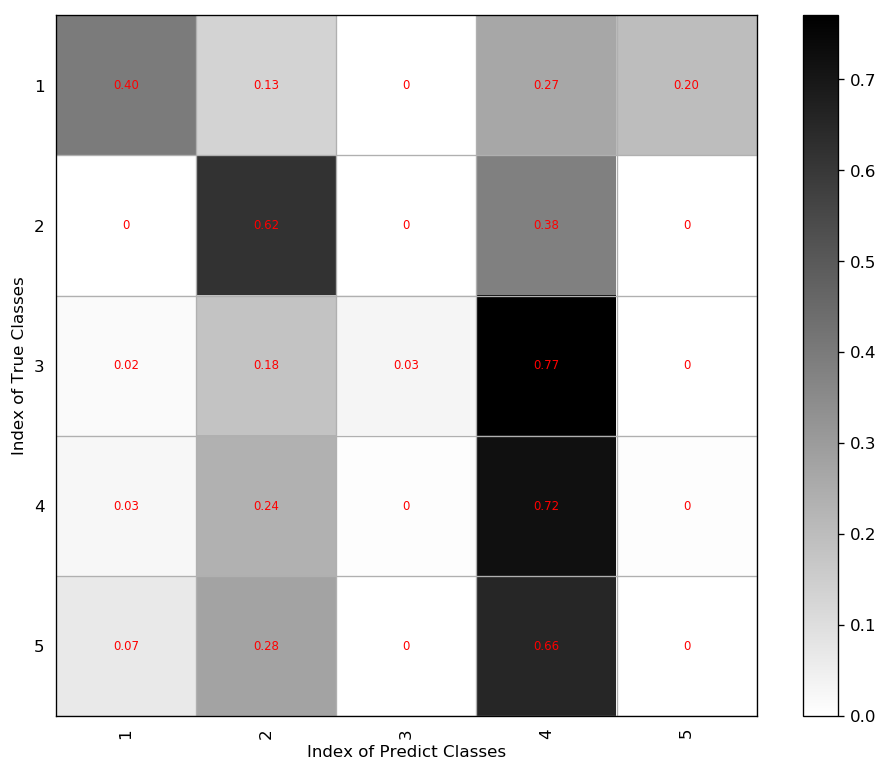

In [2]:
plot_confusion_matrix(y_tar_o, nn.predict(x_tar_o),('1','2','3','4','5'))